In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
/kaggle/input/google-play-store-apps/googleplaystore.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool



from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


google-play-store-apps



In [3]:
data = pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
data.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10822,PLMGSS FR,PRODUCTIVITY,NaN,0,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up
10823,List iptv FR,VIDEO_PLAYERS,NaN,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


# Cleaning Data

In [7]:
data = data.drop(columns = ["Current Ver","Android Ver"])

In [8]:
data = data.dropna(axis=0) #Drop rows which contain missing values

data["Installs"] = data["Installs"].apply(lambda x: x.replace('+', '') if '+' in str(x) else x) #replace +
data["Installs"] = data["Installs"].apply(lambda x: x.replace(',', '') if ',' in str(x) else x) #replace ,
data["Installs"] = data["Installs"].astype('float')

data["Price"] = data["Price"].apply(lambda x: x.replace('$', '') if '$' in str(x) else x) #replace $
data["Price"] = data["Price"].astype("float")

data["Reviews"] = data["Reviews"].astype("int")

data["Size"] = data["Size"].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data["Size"] = data["Size"].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data["Size"] = data["Size"].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data["Size"] = data["Size"].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x) #convert size of apps to MB
data["Size"] = data["Size"].astype("float")





In [9]:
data.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018"
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018"
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017"
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018"


# Basic Visualization

In [10]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.083737,0.051355,-0.021903
Reviews,0.068141,1.000000,0.240413,0.641612,-0.009820
Size,0.083737,0.240413,1.000000,0.162759,-0.026242
Installs,0.051355,0.641612,0.162759,1.000000,-0.011890
Price,-0.021903,-0.009820,-0.026242,-0.011890,1.000000


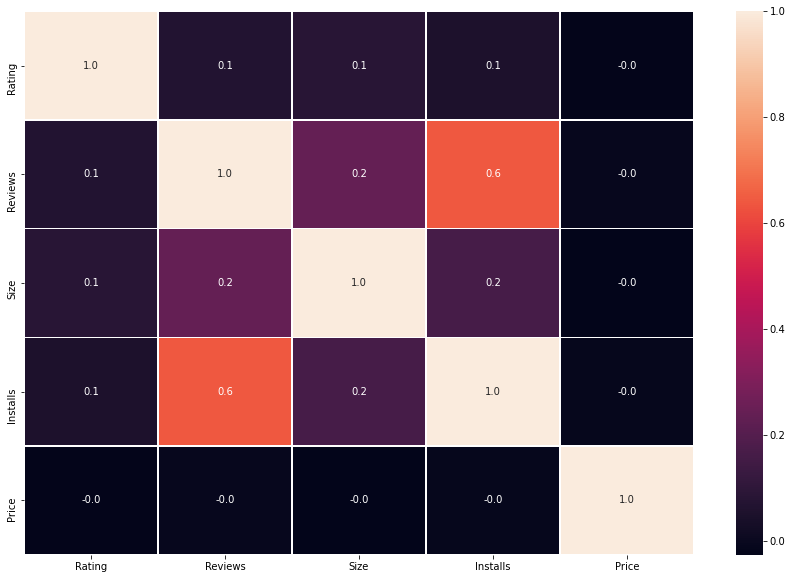

In [11]:
#correlation map
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


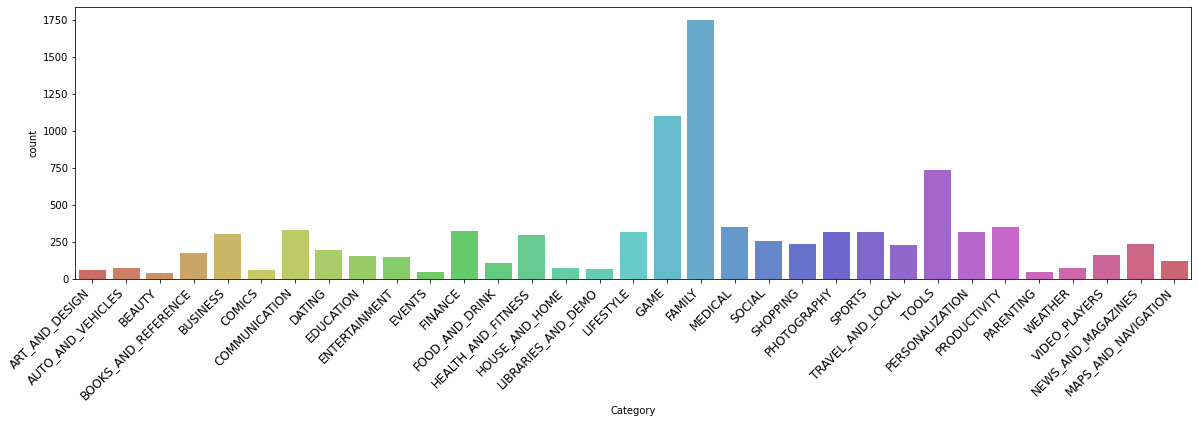

In [12]:
f,ax = plt.subplots(figsize=(20, 5))
sns.countplot(x=data['Category'], palette="hls")
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='large')
plt.show()

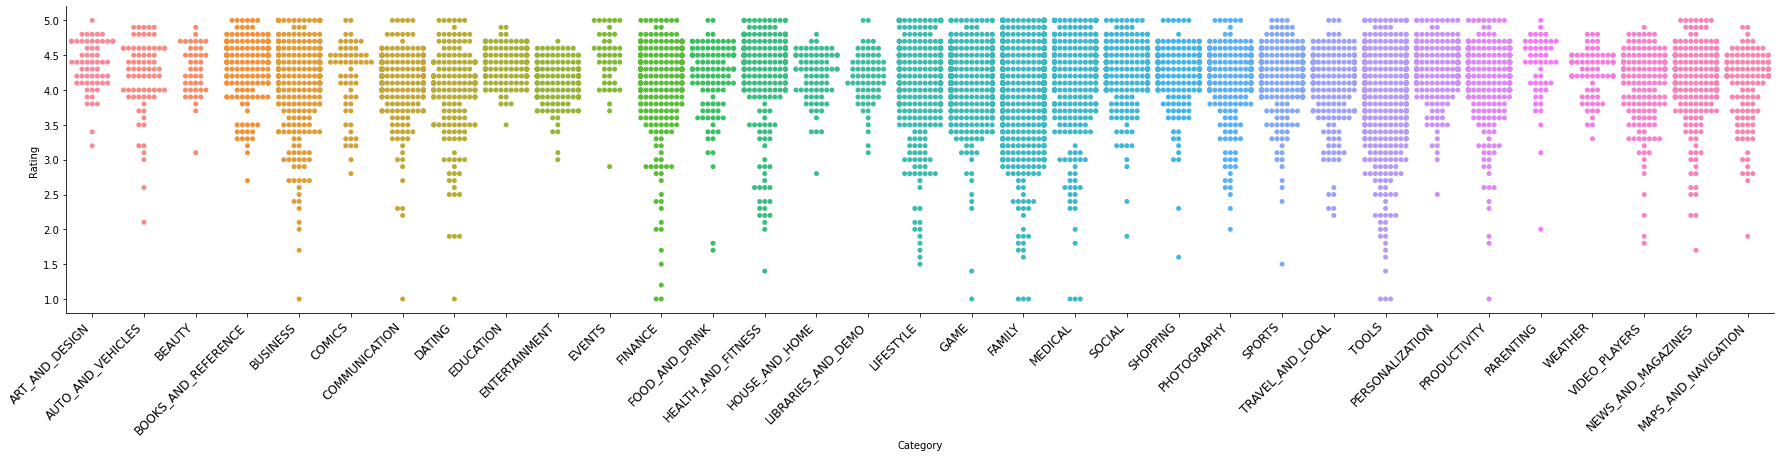

In [13]:
sns.catplot(x="Category", y="Rating", kind="swarm", data=data , height= 5 , aspect=5)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='large')
plt.show()

In [14]:
Sorted_By_Reviews = data.sort_values(by=['Reviews'], ascending=False) # Sorted by reviews 
Sorted_By_Reviews.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2544,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018"
3943,Facebook,SOCIAL,4.1,78128208,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018"
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018"
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018"
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018"
2604,Instagram,SOCIAL,4.5,66577446,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018"
2611,Instagram,SOCIAL,4.5,66577313,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018"
2545,Instagram,SOCIAL,4.5,66577313,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018"
3909,Instagram,SOCIAL,4.5,66509917,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018"
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018"


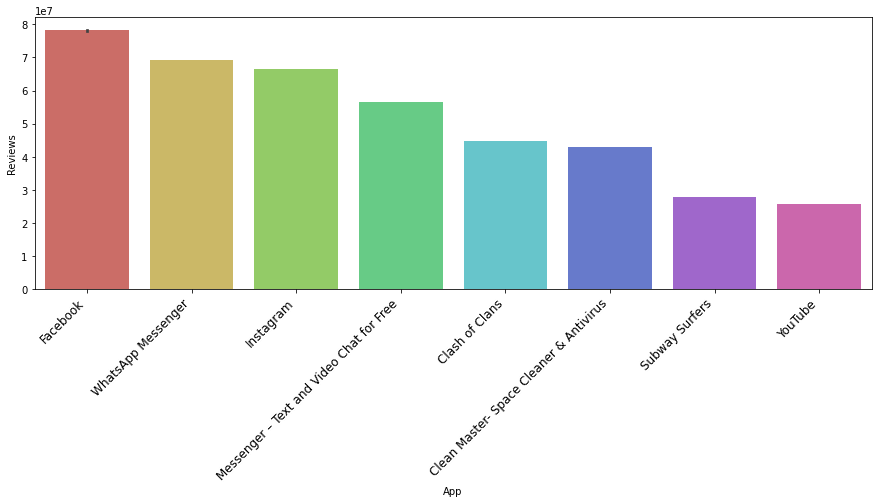

In [15]:
f,ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=Sorted_By_Reviews['App'][:25], y=Sorted_By_Reviews['Reviews'][:25], palette="hls")
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='large')
plt.show()